## 02-Regression: Homework 2

In this homework, we will use the California Housing Prices from Kaggle.  The goal of this homework is to create a regression model for predicting housing prices (column 'median_house_value').

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset

In [2]:
# Download the data
# !wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

In [3]:
df_raw = pd.read_csv("housing.csv")

In [4]:
df_raw.head(n=2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY


### EDA

Look at the median_house_value variable. Does it have a long tail?

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

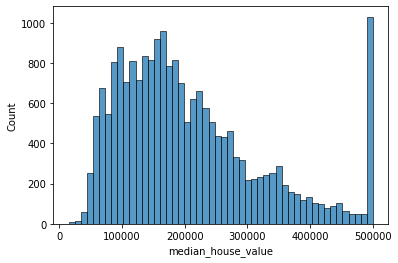

In [5]:
sns.histplot(df_raw.median_house_value, bins=50) # Yes, the variable has long tail - a right skew with a spike right at the end.

<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

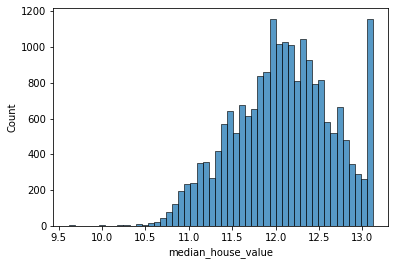

In [6]:
sns.histplot(np.log1p(df_raw.median_house_value), bins=50)

In [7]:
# Select only these features/columns

select = ['latitude', 'longitude', 
          'housing_median_age', 'total_rooms',
          'total_bedrooms', 'population', 
          'households', 'median_income',
          'median_house_value']
df = df_raw[ select ]
df.head(n=2)

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,37.88,-122.23,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,37.86,-122.22,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            20640 non-null  float64
 1   longitude           20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [9]:
df.describe()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,35.631861,-119.569704,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.135952,2.003532,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,32.540000,-124.350000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,33.930000,-121.800000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,34.260000,-118.490000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.710000,-118.010000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,41.950000,-114.310000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


###  Question 1
Find a feature with missing values. How many missing values does it have?  
207 307 408 508

In [10]:
df.isnull().sum()   # The feature 'total_bedrooms' has 207 missing values.

latitude                0
longitude               0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Question 2

What's the median (50% percentile) for variable 'population'?  
1133 1122 1166 1188

In [11]:
df.population.median()  # The variable 'population' has median = 1166.

1166.0

### Split the data

* Shuffle the initial dataset, use seed 42.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the np.log1p() function.

In [12]:
# Determine the sizes of the three sets
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

print(f"total:{n}, train:{n_train}, validation:{n_val}, test:{n_test}")

total:20640, train:12384, validation:4128, test:4128


In [13]:
# Get the row index and shuffle it using seed 42.

idx = np.arange(n)
idx

array([    0,     1,     2, ..., 20637, 20638, 20639])

In [14]:
np.random.seed(42)
np.random.shuffle(idx)
idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [15]:
# Split the dataset using the shuffled index

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [16]:
len(df_train), len(df_val), len(df_test)

(12384, 4128, 4128)

In [17]:
# Reset indexes on the split sets
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [18]:
# Apply log transform on response variable
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [19]:
# Drop response variable from the feature dataframes
df_train.drop("median_house_value", axis=1, inplace=True)
df_val.drop("median_house_value", axis=1, inplace=True)
df_test.drop("median_house_value", axis=1, inplace=True)

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)

#####  Which option gives better RMSE?
  Options:  
* With 0
* With mean
* Both are equally good

In [20]:
def train_linear_regression(X, y):

    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [21]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [22]:
# Training the regression model: fill missing values with 0

X_train_fill0 = df_train.fillna(0).values  # fill in missing values for training set

w0, w = train_linear_regression(X_train_fill0, y_train)  # train the model

# fill missing values in validation set
X_val_fill0 = df_val.fillna(0).values

y_pred_fill0 = w0 + X_val_fill0.dot(w)  # predict on the validation set

y_pred_fill0.shape

(4128,)

In [23]:
# Training the regression model: fill missing values with train_mean

train_mean = df_train['total_bedrooms'].mean()

X_train_fillmean = df_train.fillna(train_mean).values

w0, w = train_linear_regression(X_train_fillmean, y_train)

# fill missing values in validation set
X_val_fillmean = df_val.fillna(train_mean).values

y_pred_fillmean = w0 + X_val_fillmean.dot(w)

y_pred_fillmean.shape

(4128,)

In [24]:
# Compute and compare the rmse's:  Rounded to 2 dec places, both 0 and mean options appear to be equally good
print(f"Fill-0 rmse: { round( rmse(y_val, y_pred_fill0), 2) }" )
print(f"Fill-mean  rmse: { round( rmse(y_val, y_pred_fillmean), 2)}")

Fill-0 rmse: 0.33
Fill-mean  rmse: 0.33


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.

Which r gives the best RMSE? If there are multiple options, select the smallest r.

Options:
* 0
* 0.000001
* 0.001
* 0.0001

In [25]:
# training linear regression with regularization
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [26]:
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
rmse_list = []

for r in r_list:
    X_train = df_train.fillna(0).values # fill in missing values for training set
    w0, w = train_linear_regression_reg(X_train, y_train, r)  # train the regularized model
    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)  
    rmse_list.append( round( rmse(y_val, y_pred), 2 ) )
    
rmse_list

[0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.33, 0.34, 0.34]

In [27]:
# The best rmse is 0.33, and the smallest r which gives rmse=0.33 is 0.

### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: \[0, 1, 2, 3, 4, 5, 6, 7, 8, 9\].
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
* Round the result to 3 decimal digits (round(std, 3))
* Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the   same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.

#### Options:
* 0.16
* 0.00005
* 0.005
* 0.15555

In [28]:
seed_list =  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
n = len(df)
rmse_list = []

for seed in seed_list:
    # get the train and validation sets
    idx = np.arange(n)
    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    np.random.seed(seed)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    df_train.drop("median_house_value", axis=1, inplace=True)
    df_val.drop("median_house_value", axis=1, inplace=True)
    
    # train the vanilla regression model
    X_train = df_train.fillna(0).values
    w0, w = train_linear_regression(X_train, y_train)
    X_val = df_val.fillna(0).values
    y_pred = w0 + X_val.dot(w)
    # compute the rmse for validation set
    rmse_list.append( rmse(y_val, y_pred) )
    
round( np.std(rmse_list), 3)    


0.004

### Question 6
* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with r=0.001.

#### What's the RMSE on the test dataset?
Options:
* 0.35
* 0.135
* 0.450
* 0.245

In [29]:
n = len(df)
idx = np.arange(n)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

np.random.seed(9)
np.random.shuffle(idx)

df_train = df.iloc[ idx[:n_train+n_val] ]
df_test = df.iloc[ idx[n_train+n_val:] ]

df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

df_train.drop("median_house_value", axis=1, inplace=True)
df_test.drop("median_house_value", axis=1, inplace=True)
    
# train the  regression model with regularization
X_train = df_train.fillna(0).values
w0, w = train_linear_regression_reg(X_train, y_train, 0.001)
X_test = df_test.fillna(0).values
y_pred = w0 + X_test.dot(w)
# compute the rmse for validation set
rmse(y_test, y_pred) 

0.3453168914376463

In [30]:
# rmse = 0.35